## Decision Tree  -  Supervised Algorithm  

#### Predict Loan Eligibility for Dream Housing Finance company

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("Loan Approval Prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.shape

(614, 13)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Handling Missing Values

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.notnull().sum()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

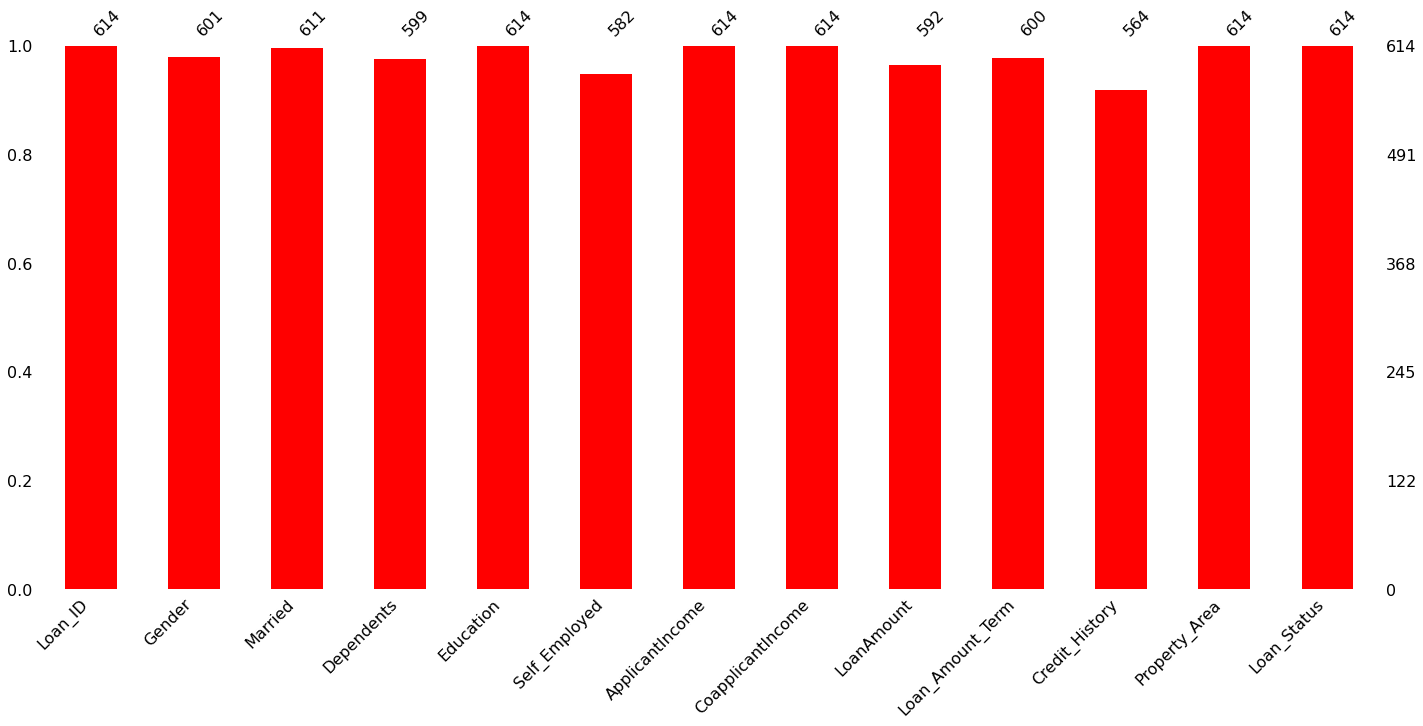

In [10]:
import missingno as msno
msno.bar(df,color = "red")
plt.show()

In [11]:
df["Gender"].fillna(df["Gender"].value_counts().index[1],inplace = True)

In [12]:
df.drop(["Loan_ID"],axis = 1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
numerical_columns = ["ApplicantIncome","CoapplicantIncome","LoanAmount","LoanAmount","Loan_Amount_Term","Credit_History"]
categorical_columns = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]

In [14]:
for j in  categorical_columns:
    print(df[j].value_counts())

Male      489
Female    125
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [15]:
for i in numerical_columns :
    print(df[i].mean())

5403.459283387622
1621.245798027101
146.41216216216216
146.41216216216216
342.0
0.8421985815602837


In [16]:
for i in numerical_columns:
    df[i].fillna(df[i].mean(),inplace = True)

In [17]:
for j in categorical_columns:
    df[j].fillna(df[j].value_counts().index[0],inplace = True)

In [18]:
df.notnull().sum()

Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
dtype: int64

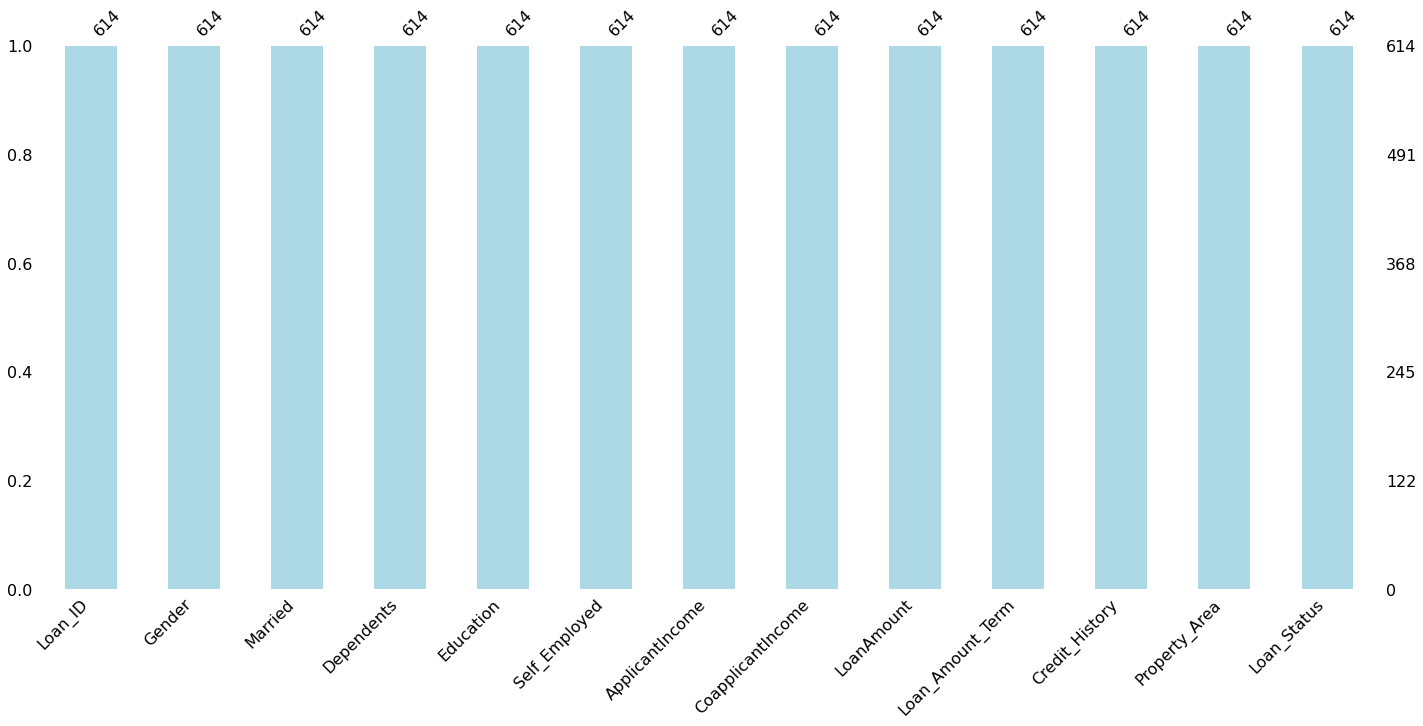

In [19]:
msno.bar(df,color ="lightblue")
plt.show()

In [20]:
df.groupby("Loan_Status").mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,150.945488,344.000000,0.562232
Y,5384.068720,1504.516398,144.349606,341.090047,0.969577


In [21]:
df.groupby("Loan_Status").std()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,6819.558528,4384.060103,83.361163,68.143673,0.488232
Y,5765.441615,1924.754855,84.361109,62.644087,0.133745


### Visualization of Categorical Columns

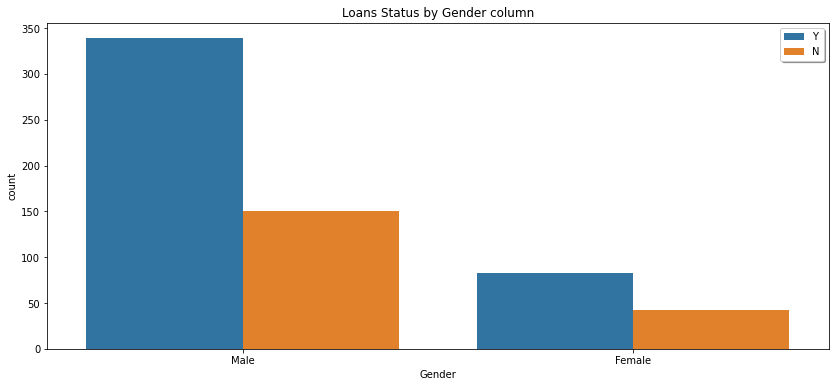

In [22]:
plt.figure(figsize = (14,6))
sns.countplot(df["Gender"],hue = df["Loan_Status"],data = df)
plt.legend(shadow = 1,loc = "best")
plt.title("Loans Status by Gender column")
plt.show()

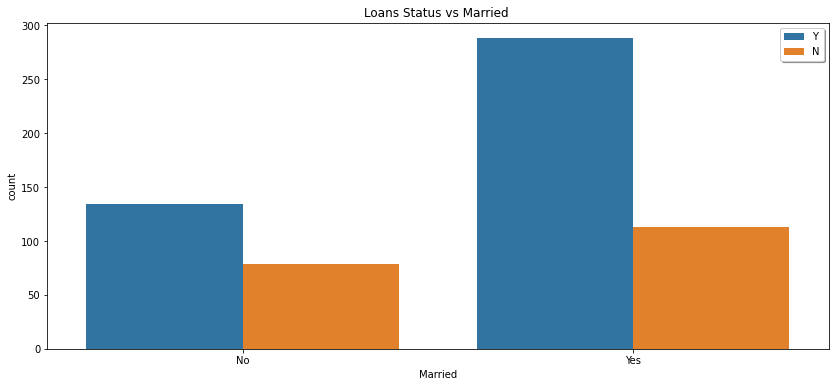

In [23]:
plt.figure(figsize = (14,6))
sns.countplot(df["Married"],hue = df["Loan_Status"],data = df)
plt.legend(shadow = 1,loc = "best")
plt.title("Loans Status vs Married ")
plt.show()

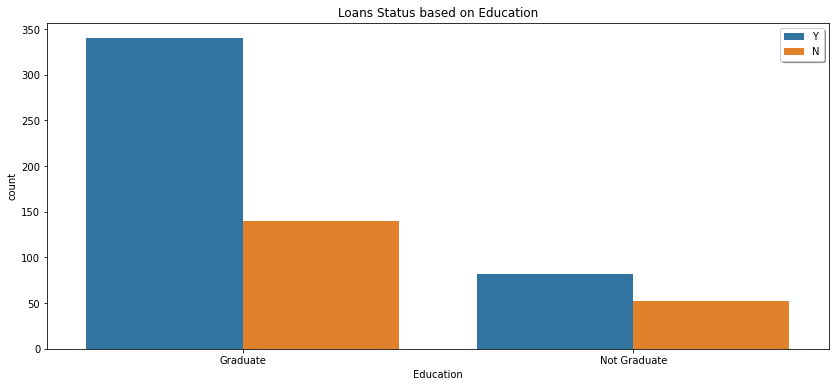

In [47]:
plt.figure(figsize = (14,6))
sns.countplot(df["Education"],hue = df["Loan_Status"],data = df)
plt.legend(shadow = 1,loc = "best")
plt.title("Loans Status based on Education")
plt.show()

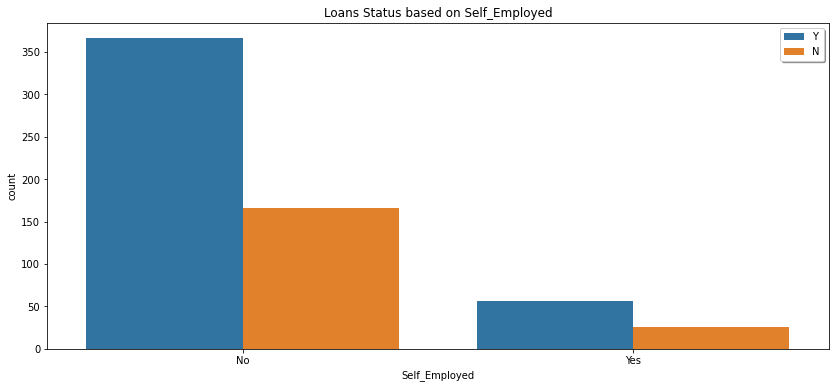

In [25]:
plt.figure(figsize = (14,6))
sns.countplot(df["Self_Employed"],hue = df["Loan_Status"],data = df)
plt.legend(shadow = 1,loc = "best")
plt.title("Loans Status based on Self_Employed")
plt.show()

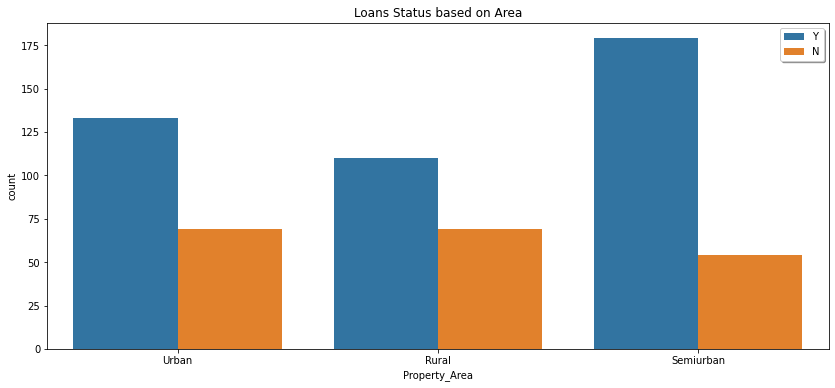

In [26]:
plt.figure(figsize = (14,6))
sns.countplot(df["Property_Area"],hue = df["Loan_Status"],data = df)
plt.legend(shadow = 1,loc = "best")
plt.title("Loans Status based on Area")
plt.show()

### Visualization of Numerical Columns 

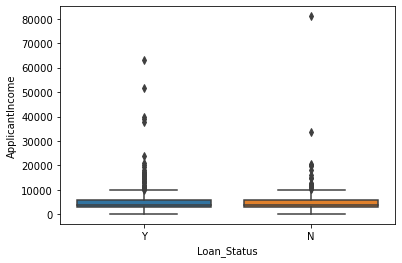

In [27]:
sns.boxplot(y = "ApplicantIncome",data = df,x = "Loan_Status")
plt.show()

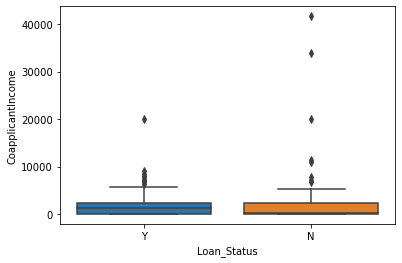

In [28]:
sns.boxplot(y = "CoapplicantIncome",data = df,x = "Loan_Status")
plt.show()

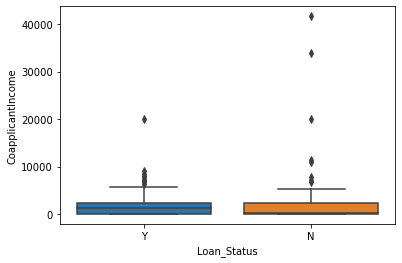

In [29]:
sns.boxplot(y = "CoapplicantIncome",data = df,x = "Loan_Status")
plt.show()

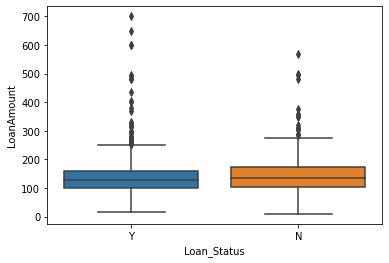

In [30]:
sns.boxplot(y = "LoanAmount",data = df,x = "Loan_Status")
plt.show()

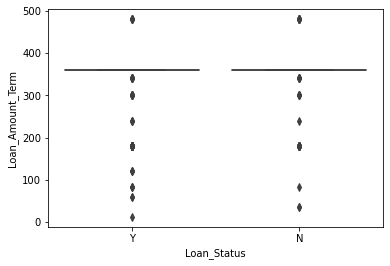

In [31]:
sns.boxplot(y = "Loan_Amount_Term",data = df,x = "Loan_Status")
plt.show()

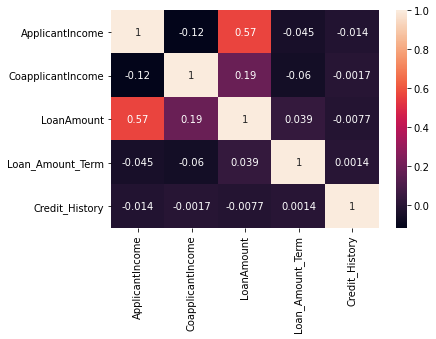

In [32]:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [33]:
dummy_Gender = pd.get_dummies(df["Gender"],prefix = "Gender")
dummy_Married = pd.get_dummies(df["Married"],prefix = "Married")
dummy_Dependents = pd.get_dummies(df["Dependents"],prefix = 'Dependents')
dummy_Education = pd.get_dummies(df["Education"],prefix = "Education")
dummy_Self_Employed  = pd.get_dummies(df["Self_Employed"],prefix = "Self_Employed")
dummy_Property_Area = pd.get_dummies(df["Property_Area"],prefix = 'Property')
dummy_Loan_Status = pd.get_dummies(df["Loan_Status"],prefix = "Loan_Approve")

In [34]:
categorical_columns = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]

In [35]:
dummy_columns = [df,dummy_Gender,dummy_Married,dummy_Dependents,dummy_Education,dummy_Self_Employed,dummy_Property_Area,dummy_Loan_Status]
df = pd.concat(dummy_columns,axis = 1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Loan_Approve_N,Loan_Approve_Y
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,...,0,1,0,1,0,0,0,1,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,0,1,0,1,0,1,0,0,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,0,1,0,0,1,0,0,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,0,0,1,1,0,0,0,1,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,0,1,0,1,0,0,0,1,0,1


In [36]:
df_final = df.drop(["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status","Loan_Approve_N"],axis = 1)
df_final.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Loan_Approve_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1


In [37]:
X = df_final.drop(["Loan_Approve_Y"],axis = 1)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Rural,Property_Semiurban,Property_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [38]:
y = df_final["Loan_Approve_Y"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Approve_Y, dtype: uint8

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.5,random_state = 1)

### Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [41]:
tree_clf = DecisionTreeClassifier()

In [42]:
tree_clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [43]:
Y_predict = tree_clf.predict(X_test)
Y_predict

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

#### Accuracy of the model

In [44]:
print("Accuracy:",accuracy_score(Y_test,Y_predict))

Accuracy: 0.6970684039087948


In [45]:
c_m = np.array(confusion_matrix(Y_test,Y_predict))
c_m

array([[ 49,  49],
       [ 44, 165]], dtype=int64)

#### Decision Making in Decision Tree

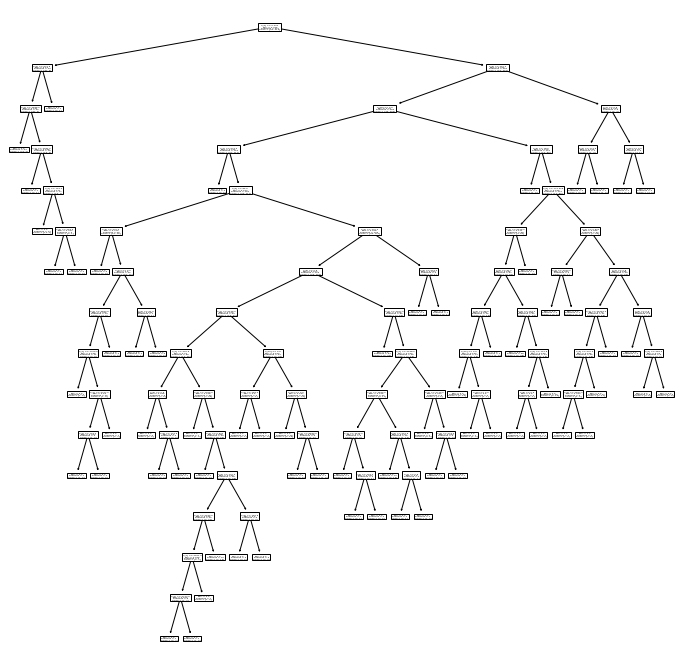

In [46]:
from sklearn import tree
plt.figure(figsize = (12,12))
tree.plot_tree(tree_clf)
plt.show()